The dataset is reduced to 5 independant variables to predict rate_spread.
<ul>
<li>loan_type (categorical) - Indicates whether the loan granted, applied for, or purchased was conventional, government-guaranteed, or government-insured</li>
<li>property_type (categorical) - Indicates whether the loan or application was for a one-to-four-family dwelling (other than manufactured housing), manufactured housing, or multifamily dwelling</li>
<li>loan_purpose (categorical) - Indicates whether the purpose of the loan or application was for home purchase, home improvement, or refinancing</li>
<li>loan_amount (int) - Size of the requested loan in thousands of dollars</li>
<li>applicant_income (int) - In thousands of dollars</li>
</ul>

### Step 1: Import libraries

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import sklearn

Using TensorFlow backend.


In [2]:
df = pd.read_csv('traintop.csv')

In [3]:
df.head()

,loan_type,property_type,loan_purpose,loan_amount,applicant_income,rate_spread
0,2,1,1,139,77.0,1
1,2,2,1,160,42.0,2
2,1,2,1,168,34.0,3
3,1,2,1,57,37.0,6
4,2,1,2,25,46.0,4


In [4]:
df.tail()

,loan_type,property_type,loan_purpose,loan_amount,applicant_income,rate_spread
199995,1,1,3,24,26.0,1
199996,1,2,1,20,28.0,5
199997,4,1,3,67,NaN,1
199998,2,1,3,330,NaN,1
199999,2,1,2,11,70.0,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
loan_type           200000 non-null int64
property_type       200000 non-null int64
loan_purpose        200000 non-null int64
loan_amount         200000 non-null int64
applicant_income    189292 non-null float64
rate_spread         200000 non-null int64
dtypes: float64(1), int64(5)
memory usage: 9.2 MB


In [6]:
df.describe()

,loan_type,property_type,loan_purpose,loan_amount,applicant_income,rate_spread
count,200000.000000,200000.000000,200000.000000,200000.000000,189292.000000,200000.000000
mean,1.570935,1.154880,1.482605,142.574940,73.617902,1.979110
std,0.559410,0.365066,0.822156,142.559487,105.696934,1.656809
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,67.000000,39.000000,1.000000
50%,2.000000,1.000000,1.000000,116.000000,56.000000,1.000000
75%,2.000000,1.000000,2.000000,179.000000,83.000000,2.000000
max,4.000000,3.000000,3.000000,11104.000000,10042.000000,99.000000


In [7]:
df['applicant_income'].value_counts()

41.0      3061
36.0      3031
42.0      2998
43.0      2945
37.0      2924
          ... 
582.0        1
1277.0       1
638.0        1
2273.0       1
1275.0       1
Name: applicant_income, Length: 1039, dtype: int64

In [8]:
df['applicant_income'].isna().value_counts()

False    189292
True      10708
Name: applicant_income, dtype: int64

In [9]:
df['applicant_income'].fillna(value=56.0,inplace=True)

In [10]:
df['applicant_income'].isna().value_counts()

False    200000
Name: applicant_income, dtype: int64

In [11]:
df.head()

,loan_type,property_type,loan_purpose,loan_amount,applicant_income,rate_spread
0,2,1,1,139,77.0,1
1,2,2,1,160,42.0,2
2,1,2,1,168,34.0,3
3,1,2,1,57,37.0,6
4,2,1,2,25,46.0,4


In [12]:
df.tail()

,loan_type,property_type,loan_purpose,loan_amount,applicant_income,rate_spread
199995,1,1,3,24,26.0,1
199996,1,2,1,20,28.0,5
199997,4,1,3,67,56.0,1
199998,2,1,3,330,56.0,1
199999,2,1,2,11,70.0,6


In [13]:
df.describe()

,loan_type,property_type,loan_purpose,loan_amount,applicant_income,rate_spread
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,1.570935,1.154880,1.482605,142.574940,72.674640,1.979110
std,0.559410,0.365066,0.822156,142.559487,102.904942,1.656809
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,67.000000,40.000000,1.000000
50%,2.000000,1.000000,1.000000,116.000000,56.000000,1.000000
75%,2.000000,1.000000,2.000000,179.000000,80.000000,2.000000
max,4.000000,3.000000,3.000000,11104.000000,10042.000000,99.000000


### Step 2: Data Exploration and Visualization

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
sns.barplot(x=df.loan_type,y=df.rate_spread)
plt.show()

In [ ]:
sns.barplot(x=df.property_type,y=df.rate_spread)
plt.show()

In [ ]:
sns.barplot(x=df.loan_purpose,y=df.rate_spread)
plt.show()

In [ ]:
plt.figure(figsize=(20,15))
sns.distplot(df.loan_amount)
plt.show()

In [ ]:
plt.figure(figsize=(20,15))
sns.distplot(df.applicant_income)
plt.show()

In [ ]:
plt.figure(figsize=(20,15))
sns.distplot(df.rate_spread)
plt.show()

In [ ]:
sns.scatterplot(x=df.loan_amount,y=df.rate_spread)
plt.show()

In [ ]:
sns.regplot(x=df.loan_amount,y=df.rate_spread,data=df,line_kws = {'color': 'red'})
plt.show()

In [ ]:
sns.regplot(x=df.applicant_income,y=df.rate_spread,data=df,line_kws = {'color': 'red'})
plt.show()

### Step 3: Create testing and training dataset

In [ ]:
X_train = df['loan_amount']
y_train = df['rate_spread']

### Step 4: Build and train model

In [ ]:
X_train.shape

In [ ]:
y_train.shape

**Single neuron model**

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=5, input_shape=[1]))
model.add(tf.keras.layers.Dense(units=1))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1),loss='mean_squared_error')

In [ ]:
epochs_hist = model.fit(X_train,y_train,epochs=20)

### Step 5: Evaluate the model

In [ ]:
epochs_hist.history.keys()

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [ ]:
model.get_weights()

In [ ]:
# Use the trained model to perform predictions

loan = 46
rate = model.predict([loan])
print('Rate Spread Predictions Using Trained ANN =', rate)

## Deep neural network model

### Step 2: Data visualization

In [14]:
X_numerical = df[['loan_amount','applicant_income','rate_spread']]

In [16]:
X_numerical.head()

,loan_amount,applicant_income,rate_spread
0,139,77.0,1
1,160,42.0,2
2,168,34.0,3
3,57,37.0,6
4,25,46.0,4


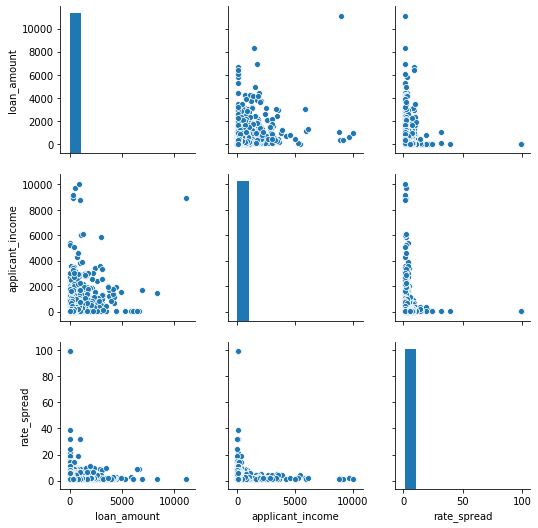

In [17]:
sns.pairplot(X_numerical)
plt.show()

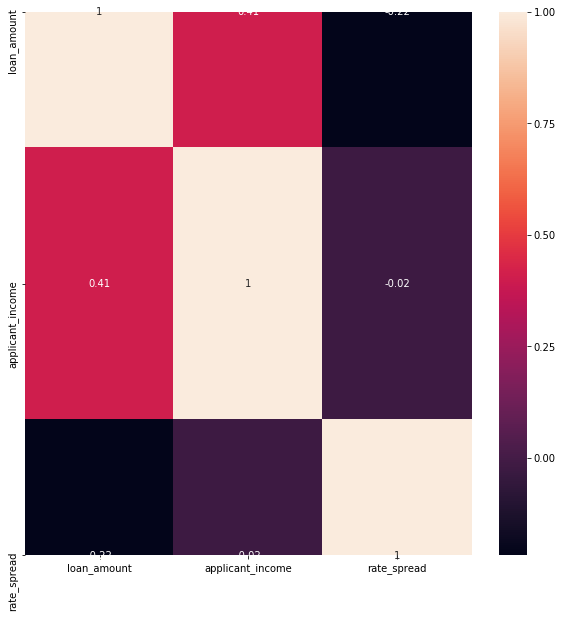

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(X_numerical.corr(),annot=True)
plt.show()

In [19]:
X_numerical.corr()

,loan_amount,applicant_income,rate_spread
loan_amount,1.000000,0.409797,-0.218168
applicant_income,0.409797,1.000000,-0.019714
rate_spread,-0.218168,-0.019714,1.000000


In [20]:
X_cat = df[['loan_type','property_type','loan_purpose']]

In [22]:
X_cat.head()

,loan_type,property_type,loan_purpose
0,2,1,1
1,2,2,1
2,1,2,1
3,1,2,1
4,2,1,2


In [23]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [24]:
X_cat = enc.fit_transform(X_cat).toarray()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [25]:
X_cat

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [26]:
X_cat.shape

(200000, 10)

In [27]:
X_cat = pd.DataFrame(X_cat)

In [29]:
X_cat.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [30]:
X_selection = X_numerical[['loan_amount','applicant_income']] # Need to scale first

In [31]:
X_selection.head()

,loan_amount,applicant_income
0,139,77.0
1,160,42.0
2,168,34.0
3,57,37.0
4,25,46.0


In [32]:
X_selection.shape

(200000, 2)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selection)

In [34]:
X_scaled

array([[-0.02507689,  0.04203268],
       [ 0.1222304 , -0.29808789],
       [ 0.17834747, -0.37582973],
       ...,
       [-0.53013048, -0.16203966],
       [ 1.31471803, -0.16203966],
       [-0.92294993, -0.02599143]])

In [35]:
X_scaled.shape

(200000, 2)

In [37]:
X_scaled = pd.DataFrame(X_scaled)

In [38]:
X_scaled.head()

,0,1
0,-0.025077,0.042033
1,0.122230,-0.298088
2,0.178347,-0.375830
3,-0.600277,-0.346677
4,-0.824745,-0.259217


In [51]:
X_scaled.rename(columns={0 : 'loan_amount', 1:'applicant_income'}, inplace=True)

In [52]:
X_scaled

,loan_amount,applicant_income
0,-0.0250769,0.0420327
1,0.12223,-0.298088
2,0.178347,-0.37583
3,-0.600277,-0.346677
4,-0.824745,-0.259217
...,...,...
199995,-0.83176,-0.453572
199996,-0.859818,-0.434136
199997,-0.53013,-0.16204
199998,1.31472,-0.16204


In [53]:
X_all = pd.concat([X_cat,X_scaled], axis=1)

In [54]:
X_all.head()

,0,1,2,3,4,5,6,7,8,9,loan_amount,applicant_income
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.0250769,0.0420327
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.12223,-0.298088
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.178347,-0.37583
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.600277,-0.346677
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.824745,-0.259217


In [55]:
X_all.shape

(200000, 12)

In [56]:
X_all

,0,1,2,3,4,5,6,7,8,9,loan_amount,applicant_income
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.0250769,0.0420327
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.12223,-0.298088
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.178347,-0.37583
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.600277,-0.346677
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.824745,-0.259217
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.83176,-0.453572
199996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.859818,-0.434136
199997,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.53013,-0.16204
199998,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.31472,-0.16204


In [57]:
y = X_numerical['rate_spread']

In [58]:
y

0         1
1         2
2         3
3         6
4         4
         ..
199995    1
199996    5
199997    1
199998    1
199999    6
Name: rate_spread, Length: 200000, dtype: int64

In [59]:
trainmodified = pd.concat([X_all,y], axis=1)

In [60]:
trainmodified

,0,1,2,3,4,5,6,7,8,9,loan_amount,applicant_income,rate_spread
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.0250769,0.0420327,1
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.12223,-0.298088,2
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.178347,-0.37583,3
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.600277,-0.346677,6
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.824745,-0.259217,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.83176,-0.453572,1
199996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.859818,-0.434136,5
199997,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.53013,-0.16204,1
199998,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.31472,-0.16204,1


In [61]:
#trainmodified.to_csv('trainmodified.csv',index=False)

### Step 3: Create testing and training dataset

In [66]:
X = trainmodified.iloc[:,:-1].values

In [67]:
X

array([[0.0, 1.0, 0.0, ..., 0.0, -0.025076892551572586,
        0.0420326831495945],
       [0.0, 1.0, 0.0, ..., 0.0, 0.12223040311857142,
        -0.2980878872158332],
       [1.0, 0.0, 0.0, ..., 0.0, 0.17834746813576913,
        -0.3758297318707881],
       ...,
       [0.0, 0.0, 0.0, ..., 1.0, -0.530130477706352, -0.1620396590696621],
       [0.0, 1.0, 0.0, ..., 1.0, 1.3147180347340228, -0.1620396590696621],
       [0.0, 1.0, 0.0, ..., 0.0, -0.922949932826736,
        -0.02599143092349104]], dtype=object)

In [68]:
y = trainmodified.iloc[:,-1:].values

In [69]:
y

array([[1],
       [2],
       [3],
       ...,
       [1],
       [1],
       [6]], dtype=int64)

In [70]:
X.shape

(200000, 12)

In [71]:
y.shape

(200000, 1)

In [89]:
type(X)

numpy.ndarray

In [90]:
type(y)

numpy.ndarray

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [73]:
X_train.shape

(160000, 12)

In [74]:
X_test.shape

(40000, 12)

In [85]:
y_train.shape

(160000, 1)

### Step 4: Create model and training

In [91]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=12,activation='relu',input_shape=(12,)))
model.add(tf.keras.layers.Dense(units=12,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='linear'))

In [92]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_7 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 13        
Total params: 325
Trainable params: 325
Non-trainable params: 0
_________________________________________________________________


In [93]:
model.compile(optimizer='Adam',loss='mean_squared_error')

In [94]:
epochs_hist = model.fit(X_train,y_train,epochs=20,validation_split=0.2,batch_size=100)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).